## Project Code IST_652

### Project Author: 
1. Ruchita Jadhav 

### System Specificaation: 
1. Google Colab Link - https://colab.research.google.com/drive/1rWLDGCaJU2zvb8p-fy0J4stD5IkeRlTE
2. Report Link - https://docs.google.com/document/d/1C6DrqPbS-QnTY5Tb1jN4zkmhQ5rxZ6V6GChM1LnFARQ/edit?usp=sharing


### Downloading the Dataset

In [6]:
! wget https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_multilingual_US_v1_00.tsv.gz

--2020-05-05 03:15:09--  https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_multilingual_US_v1_00.tsv.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.83.83
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.83.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1466965039 (1.4G) [application/x-gzip]
Saving to: ‘amazon_reviews_multilingual_US_v1_00.tsv.gz.1’

amazon_reviews_mult 100%[===================>]   1.37G  22.6MB/s    in 47s     

2020-05-05 03:15:56 (29.9 MB/s) - ‘amazon_reviews_multilingual_US_v1_00.tsv.gz.1’ saved [1466965039/1466965039]



In [0]:
! gunzip amazon_reviews_multilingual_US_v1_00.tsv.gz

### Reading the Dataset

In [8]:
# Importing necessary libraries for reading the data
import pandas as pd

# Importing necessary libraries for visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
import os
import plotly.express as px
import ast
import time
import re

# Importing nltk based libraries for text processing
from bs4 import BeautifulSoup
import lxml
import string
import nltk
from nltk import *
nltk.download('tagsets')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# Importing scikit learn based libraries for modeling sentiment analysis
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
from sklearn import svm

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Reading the data set using pandas librry's read_csv function. We use sep = "\t" and
# skip bad lines using error_bad_lines = False
data1 = pd.read_csv("amazon_reviews_multilingual_US_v1_00.tsv",sep='\t', error_bad_lines=False)

b'Skipping line 3231472: expected 15 fields, saw 22\n'
b'Skipping line 3509762: expected 15 fields, saw 22\n'
b'Skipping line 4018793: expected 15 fields, saw 22\n'
b'Skipping line 4280173: expected 15 fields, saw 22\nSkipping line 4290596: expected 15 fields, saw 22\n'
b'Skipping line 4331421: expected 15 fields, saw 22\nSkipping line 4340267: expected 15 fields, saw 22\nSkipping line 4341665: expected 15 fields, saw 22\nSkipping line 4386155: expected 15 fields, saw 22\nSkipping line 4388098: expected 15 fields, saw 22\n'
b'Skipping line 4408027: expected 15 fields, saw 22\nSkipping line 4442615: expected 15 fields, saw 22\n'
b'Skipping line 4519623: expected 15 fields, saw 22\n'
b'Skipping line 4525797: expected 15 fields, saw 22\nSkipping line 4543519: expected 15 fields, saw 22\n'
b'Skipping line 4587726: expected 15 fields, saw 22\nSkipping line 4589301: expected 15 fields, saw 22\nSkipping line 4634393: expected 15 fields, saw 22\n'
b'Skipping line 4666168: expected 15 fields, s

### Data Description

In [10]:
# Check number of columns and types of columns
data1.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [11]:
data1.dtypes

marketplace           object
customer_id            int64
review_id             object
product_id            object
product_parent         int64
product_title         object
product_category      object
star_rating          float64
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
review_headline       object
review_body           object
review_date           object
dtype: object

In [12]:
# Count the number of records in the dataframe using count method
data1.count()

marketplace          6900886
customer_id          6900886
review_id            6900886
product_id           6900886
product_parent       6900886
product_title        6900886
product_category     6900886
star_rating          6900885
helpful_votes        6900885
total_votes          6900885
vine                 6900885
verified_purchase    6900885
review_headline      6900811
review_body          6900810
review_date          6900562
dtype: int64

In [0]:
# Drop na values using dropna() method
data1 = data1.dropna()

In [14]:
# Descriptive analytics of the dataframe using describe(). we get the statistical information
# regarding each numerical field in the datarame
data1.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,6.900413e+06,6.900413e+06,6.900413e+06,6.900413e+06,6.900413e+06
mean,2.918798e+07,4.933006e+08,4.306593e+00,2.044426e+00,3.251535e+00
std,1.565194e+07,2.861564e+08,1.146194e+00,3.184590e+01,3.634082e+01
min,1.000100e+04,2.254720e+05,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.501686e+07,2.495109e+08,4.000000e+00,0.000000e+00,0.000000e+00
50%,2.881078e+07,4.965205e+08,5.000000e+00,0.000000e+00,0.000000e+00
75%,4.414300e+07,7.448221e+08,5.000000e+00,1.000000e+00,2.000000e+00
max,5.309659e+07,9.999881e+08,5.000000e+00,2.755000e+04,2.872700e+04


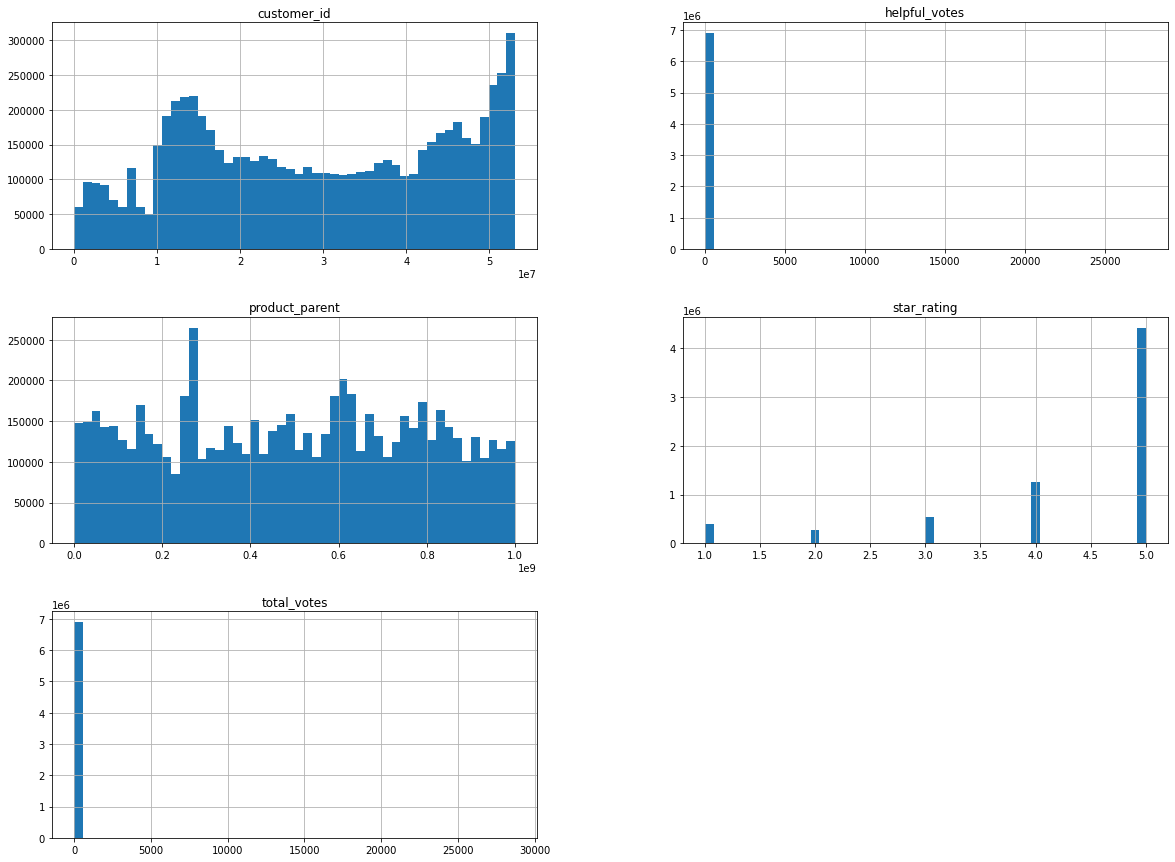

In [15]:
# Visualizing the distribution of numerical variables
data1.hist(bins=50, figsize=(20,15))
plt.show()

### Data Augmentation

In [0]:
# Bin the star_rating field into 2 categorical values positive and negative into a seperate 
# column sentiment_rating
bins = [1,2.5,5]
labels = ['negative', 'positive']
data1['sentiment_rating'] = pd.cut(data1['star_rating'], bins=bins, labels=labels)

In [17]:
# Get the distribution of the categorical target variable using value_counts()
data1.sentiment_rating.value_counts()

positive    6217060
negative     278458
Name: sentiment_rating, dtype: int64

In [0]:
# Sample the data based on group by on the target categorical column - sentiment_rating.
# Pick 3000 entries from each category for a balanced dataset
g = data1.groupby('sentiment_rating')
negative = g.get_group('negative')
positive = g.get_group('positive')
negative = negative.sample(3000, random_state=20)
positive = positive.sample(3000, random_state=20)
final_data = negative.append(positive)

In [0]:
# Split the review date column to 4 seperate fields of month, year, hour and day using pandas
# datetime function
final_data['review_date'] = pd.to_datetime(final_data['review_date'])
final_data['month'] = final_data['review_date'].dt.month
final_data['year'] = final_data['review_date'].dt.year
final_data['hour'] = final_data['review_date'].dt.hour
final_data['day'] = final_data['review_date'].dt.dayofweek

In [0]:
final_data = final_data.reset_index()

In [21]:
# We check the types of product categories and the distribution of its count in 
# the dataset using a group by on product_category and aggregating the index count. 
# We can see that Mobile_apps, Digital_Ebooks and Video DVD have the highest number of 
# reviews. Mobile_apps have 1260 reviews 
reviews_by_categories_count = final_data[['product_category', 'index']].\
                                groupby('product_category').agg({'index': 'count'}).\
                                rename({'index': 'count'}, axis=1).reset_index()

px.bar(reviews_by_categories_count, x='product_category', y='count')

In [22]:
# We are interested in the number of reviews by date. 
# We perform a group by on review_date and aggregate the count on the index field. 
# This helps us give a time series based dataframe which we can plot using plotly.. 
# The reason we use plotty is because plotty features zoom in capability. 
# We can zoom into a particular span of interest to get more information by day or by month. 
# Upon plotting we see that there are a greater number of reviews from 205 to 2016. 
# After zooming into this period we can see that, the number of reviews are the greatest(25)
# in the month of January 2015
reviews_by_time_count = final_data[['review_date', 'index']].\
                                groupby('review_date').agg({'index': 'count'}).\
                                rename({'index': 'count'}, axis=1).reset_index()

fig = px.line(reviews_by_time_count, x='review_date', y='count')
fig.show()

In [23]:
# Next, we are interested in the month which have the highest reviews in the dataset. 
# This will give us an understanding of the months when people generally buy amazon products
# and write reviews about it. 
# We answer this question by performing a group by on the month field and aggregating 
# the count on index

reviews_by_month_count = final_data[['month', 'index']].\
                                groupby('month').agg({'index': 'count'}).\
                                rename({'index': 'count'}, axis=1).reset_index()

px.bar(reviews_by_month_count, x='month', y='count')

In [24]:
# We want to see how the ratings are distributed in the dataset. 
# Hence we perform a groupby aggregation on start_rating and sentiment_rating field. 
# We can clearly see that there are 50% reviews with rating = 2.0 and 35% reviews 
# with rating 5.0 and 10% with rating 4.0. 
# But running the same analysis on the augmented field sentiment_rating which is a 
# categorical field based on star_rating we see that the positive and negative 
# are both balanced.
sentiment_by_rating_count = final_data[['star_rating', 'index']].\
                                groupby('star_rating').agg({'index': 'count'}).\
                                rename({'index': 'count'}, axis=1).reset_index()

px.pie(sentiment_by_rating_count, labels='star_rating', values='count', names='star_rating')

In [25]:
sentiment_by_rating_count = final_data[['sentiment_rating', 'index']].\
                                groupby('sentiment_rating').agg({'index': 'count'}).\
                                rename({'index': 'count'}, axis=1).reset_index()

px.pie(sentiment_by_rating_count, labels='sentiment_rating', values='count', names='sentiment_rating')

In [26]:
# Next, we want to check which category of products have high average star_rating 
# and low average star_rating. We can achieve this with a box plot on the star_rating 
# and product_category column. We see that Video_DVD, Mobile_Apps, Ebook, Music have 5.0 
# ratings in the third quartile. 
# Whereas, kitchen products have a median rating of 2.0 and third quartile being 3.5.

fig = px.box(final_data, x="product_category", y="star_rating")
fig.show()

In [27]:
final_data.head()

,index,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment_rating,month,year,hour,day
0,3228785,US,45294525,R2SPNBOQIMF5ZQ,B00GK5X2HC,89201247,Percy Jackson: Sea Of Monsters,Digital_Video_Download,2.0,2.0,4.0,N,Y,An ok movie with a predictable story,"Ok movie, but the first one in the series was ...",2013-12-12,negative,12,2013,0,3
1,2769455,US,22897787,R1TJI3ZEH1498D,B0078ZTWP4,122924047,LE 1000lm Dimmable Portable LED Camping Lanter...,Outdoors,2.0,2.0,2.0,N,Y,ever led lantern,It is cheaper but I had to send one back becau...,2013-08-04,negative,8,2013,0,6
2,3971818,US,49595057,RVNRVWYZNP7HJ,B00H83EUL2,126004443,Gravity [Blu-ray],Video DVD,2.0,1.0,4.0,N,Y,Fantastic cinematography and special effects.....,".... .and, unfortunately, very little else to ...",2014-04-22,negative,4,2014,0,1
3,5000954,US,31106521,R2SHWIZC1HKNQ3,B00MNUB9IC,217657171,Boxer Pro,Mobile_Apps,2.0,17.0,18.0,N,Y,Pro but without Exchange Functionalities ...,"As reported by some users here, Amazon is offe...",2014-10-30,negative,10,2014,0,3
4,396715,US,33809904,RQ6LX0NV0NB7H,B00005M989,93356818,The Very Best of Prince,Music,2.0,4.0,5.0,N,N,"Great Music, Limitied Package",It's hard to look at the career of one of this...,2004-04-05,negative,4,2004,0,0


In [0]:
# We write the cleaned data set to a csv file.
final_data[['sentiment_rating', 'review_body']].\
    to_csv('amazon_cleaned_data.csv', index=False)

### Sentiment Analysis

In [0]:
data = pd.read_csv('amazon_cleaned_data.csv')

In [30]:
# Rename the columns for sentiment analysis and use label encoer from sklearn for label encoding
# the target column 
data = data.rename({'review_body': 'text', 'sentiment_rating': 'label'}, axis=1)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Labels'] = label_encoder.fit_transform(data.label.values)
data.head()

,label,text,Labels
0,negative,"Ok movie, but the first one in the series was ...",0
1,negative,It is cheaper but I had to send one back becau...,0
2,negative,".... .and, unfortunately, very little else to ...",0
3,negative,"As reported by some users here, Amazon is offe...",0
4,negative,It's hard to look at the career of one of this...,0


In [0]:
# We will then shuffle the dataset with randomstate 20 and save the first 5000 entries as train_set 
# and the remaining 1000 entries as test_set csv files. We will use this saved train and test files 
# for our neural network step because neural networks tend to perform better on unstructured data. 
# Additionally, special characters play an important role in the sequences fed to neural networks.

data = shuffle(data, random_state=20)
data[:5000][['text', 'Labels']].to_csv('amazon_train_for_Neural_Net.csv', index=False)
data[5000:][['text', 'Labels']].to_csv('amazon_test_for_Neural_Net.csv', index=False)

In [32]:
# We will create separate columns namely WordCount, Special Character count and Uppercase Count 
# to get some insights on the instances or records containing these. 
# We perform this with the string.punctutation method and char.uuper() inside a list comprehension
import string
data['Word Count'] = [len(review.split()) for review in data['text']]
data['Uppercase Char Count'] = [sum(char.isupper() for char in review) \
                              for review in data['text']]                           
data['Special Char Count'] = [sum(char in string.punctuation for char in review) \
                            for review in data['text']]
#CREATING A NEW COLUMN IN THE DATASET FOR THE LENGTH  OF THE EACH REVIEW
data['length'] = data['text'].apply(len)
data.head()
# Now we know the length of all the reviews.

,label,text,Labels,Word Count,Uppercase Char Count,Special Char Count,length
3500,positive,There are literally 1000's of sales books out ...,1,92,11,18,488
5875,positive,A very good read but a bit confusing at times....,1,84,18,13,419
1589,negative,I and a huge fan of the &#34;Band of Brothers&...,0,94,12,20,463
1443,negative,I thought the plot was dull.,0,6,1,1,28
5756,positive,If you like comic book heroes and lots of acti...,1,20,2,3,90


In [33]:
# We then check the statistics of these columns using the describe method. 
# We can see that positive reviews have an average wordcount of 64, average special char count of 14. 
# But negative reviews have an average wordcount of 98, and average special char_count of 22. 
# This shows us that negative reviews are more expressive about the product's quality.

data[data['label']=='positive']['Word Count'].describe()

count    3000.000000
mean       64.896000
std       134.764101
min         1.000000
25%        18.000000
50%        27.000000
75%        58.000000
max      2315.000000
Name: Word Count, dtype: float64

In [34]:
data[data['label']=='negative']['Word Count'].describe()

count    3000.00000
mean       98.93600
std       159.73009
min         1.00000
25%        23.00000
50%        46.00000
75%       105.25000
max      2093.00000
Name: Word Count, dtype: float64

In [35]:
data[data['label']=='positive']['Special Char Count'].describe()

count    3000.000000
mean       14.733000
std        40.282088
min         0.000000
25%         2.000000
50%         5.000000
75%        11.000000
max       892.000000
Name: Special Char Count, dtype: float64

In [36]:
data[data['label']=='negative']['Special Char Count'].describe()

count    3000.000000
mean       22.227000
std        42.853389
min         0.000000
25%         3.000000
50%         8.000000
75%        22.000000
max       589.000000
Name: Special Char Count, dtype: float64

In [0]:
data_copy = data

### Naive Bayes NLTK

In [38]:
# Create an empty list 
Finallist =[] 
  
# Iteration over the each row 

for index, rows in data.iterrows(): 
    # Create list for the current row 
    my_list = [rows.text] 
      
    # appeding the list to the final list
    Finallist.append(my_list) 
  
# Displaying th elist generated 
print(Finallist[:1]) 

[["There are literally 1000's of sales books out there, but this is like no other.  Its not so much a 'how to' book, but more like 'The Millionaire Next Door' for sales.  Here is what the top producers do, here are the facts, do whatever you want, we don't care.  Not fancy closes, secret words to put in your presentation, nothing like that.  It truly is like no other sales book and I have listened to the audio version 3 times since I bought it and have picked up something new everytime."]]


In [39]:
print("Total number of reviews ", len(Finallist))

Total number of reviews  6000


In [0]:
# Creating the flat list from the multiple reviews.

flat_list = []
for sublist in Finallist:
    for item in sublist:
        flat_list.append(item)

In [0]:
final_sent_list = []

#  the sentences from the reviews list
for review in flat_list:
    curr_sent_list = nltk.sent_tokenize(review)
    for sent in curr_sent_list:
        final_sent_list.append(sent)


In [42]:
final_sent_list[:5]

["There are literally 1000's of sales books out there, but this is like no other.",
 "Its not so much a 'how to' book, but more like 'The Millionaire Next Door' for sales.",
 "Here is what the top producers do, here are the facts, do whatever you want, we don't care.",
 'Not fancy closes, secret words to put in your presentation, nothing like that.',
 'It truly is like no other sales book and I have listened to the audio version 3 times since I bought it and have picked up something new everytime.']

In [43]:
#The number of sentences in the final reviews list
print("The total number of sentences from the reviews ", len(final_sent_list))

The total number of sentences from the reviews  29364


In [0]:

### Pre-processing the word corpus data in the review column 

#Regular expression for punctuations
pattern_2 = r''' (?x)
    [][.,;"'?!():-_%']    
'''
temp_textList = []
for sent in final_sent_list:
   
    #Convert the sentence into lower case sentence
    sent = sent.lower()
    
    #Tokenize and obtain the words
    words = nltk.word_tokenize(sent)
    
    #If the sentence is a single punctuation mark without any other words then remove it to avoid processing in further analysis steps
    if(len(words)==1):
        if(len(nltk.regexp_tokenize(words[0], pattern_2))<0):
            temp_textList.append(sent)
    else:
        temp_textList.append(sent)
            

In [0]:
#Copy back the updated list of processed sentences
final_sent_list = temp_textList

In [46]:
#Check the length of review list
len(final_sent_list)


29019

In [0]:
# Remove defined negative words from nltk list of stopwords

negationwords = ['no', 'not', 'never', 'none', 'nowhere', 'nothing', 'noone', 'rather', 'hardly', 'scarcely', 'rarely', 'seldom', 'neither', 'nor']   # define negative words
stopwords = nltk.corpus.stopwords.words('english')                         # nltk list of stopwords
newstopwords = [word for word in stopwords if word not in negationwords]   #filtered list of stopwords

In [48]:
import nltk
nltk.download('sentence_polarity')
from nltk.corpus import sentence_polarity

[nltk_data] Downloading package sentence_polarity to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping corpora/sentence_polarity.zip.


### Bag of word approach for feature selection

In [0]:
##### Collect the sentences from the sentence_polarity corpus
bag_of_sents = sentence_polarity.sents()

#Obtain the sentences with their labels
sents_with_labels = [(sent, label) for label in sentence_polarity.categories()
                     for sent in sentence_polarity.sents(categories=label)]

In [50]:
sents_with_labels

[(['simplistic', ',', 'silly', 'and', 'tedious', '.'], 'neg'),
 (["it's",
   'so',
   'laddish',
   'and',
   'juvenile',
   ',',
   'only',
   'teenage',
   'boys',
   'could',
   'possibly',
   'find',
   'it',
   'funny',
   '.'],
  'neg'),
 (['exploitative',
   'and',
   'largely',
   'devoid',
   'of',
   'the',
   'depth',
   'or',
   'sophistication',
   'that',
   'would',
   'make',
   'watching',
   'such',
   'a',
   'graphic',
   'treatment',
   'of',
   'the',
   'crimes',
   'bearable',
   '.'],
  'neg'),
 (['[garbus]',
   'discards',
   'the',
   'potential',
   'for',
   'pathological',
   'study',
   ',',
   'exhuming',
   'instead',
   ',',
   'the',
   'skewed',
   'melodrama',
   'of',
   'the',
   'circumstantial',
   'situation',
   '.'],
  'neg'),
 (['a',
   'visually',
   'flashy',
   'but',
   'narratively',
   'opaque',
   'and',
   'emotionally',
   'vapid',
   'exercise',
   'in',
   'style',
   'and',
   'mystification',
   '.'],
  'neg'),
 (['the',
   'sto

In [0]:
#Shuffle the sentences
import random
random.shuffle(sents_with_labels)

#Obtain the most frequent words from these sentences 
#Retreiving the most frequent 2000 words

all_sents = [word for (sent, label) in sents_with_labels for word in sent if word not in newstopwords]
all_sents_freq = nltk.FreqDist(all_sents)
most_freq_words = all_sents_freq.most_common(2000)
freq_word_features = [word for (word,freq) in most_freq_words]

In [52]:
most_freq_words

[('.', 14010),
 (',', 10037),
 ('film', 1446),
 ('movie', 1268),
 ('not', 803),
 ('one', 727),
 ('like', 720),
 ('"', 655),
 ('--', 629),
 ('story', 476),
 ('no', 387),
 ('much', 386),
 ('even', 382),
 ('good', 377),
 ('comedy', 353),
 ('time', 339),
 ('characters', 313),
 ('little', 302),
 ('way', 296),
 ('funny', 283),
 ('make', 278),
 ('enough', 267),
 ('never', 262),
 ('makes', 252),
 ('may', 245),
 ('us', 241),
 ('work', 236),
 ('best', 235),
 ('bad', 233),
 ('director', 231),
 (')', 228),
 ('?', 227),
 ('(', 226),
 ('love', 224),
 ('would', 222),
 ('life', 221),
 (':', 217),
 ('movies', 209),
 ("there's", 209),
 ('new', 206),
 ('well', 206),
 ('could', 199),
 ('something', 197),
 ('really', 197),
 ('made', 193),
 ('performances', 185),
 ('drama', 183),
 ('many', 183),
 ("that's", 183),
 ('look', 179),
 ('plot', 179),
 ('films', 179),
 ('every', 178),
 ('see', 178),
 ('still', 178),
 ('two', 175),
 ('nothing', 173),
 ('people', 171),
 ('better', 169),
 ('long', 167),
 ('without', 

In [53]:
freq_word_features

['.',
 ',',
 'film',
 'movie',
 'not',
 'one',
 'like',
 '"',
 '--',
 'story',
 'no',
 'much',
 'even',
 'good',
 'comedy',
 'time',
 'characters',
 'little',
 'way',
 'funny',
 'make',
 'enough',
 'never',
 'makes',
 'may',
 'us',
 'work',
 'best',
 'bad',
 'director',
 ')',
 '?',
 '(',
 'love',
 'would',
 'life',
 ':',
 'movies',
 "there's",
 'new',
 'well',
 'could',
 'something',
 'really',
 'made',
 'performances',
 'drama',
 'many',
 "that's",
 'look',
 'plot',
 'films',
 'every',
 'see',
 'still',
 'two',
 'nothing',
 'people',
 'better',
 'long',
 'without',
 'get',
 'fun',
 'action',
 'great',
 'though',
 'might',
 'big',
 "'",
 'also',
 'another',
 'cast',
 'humor',
 'audience',
 'first',
 'kind',
 'sense',
 'ever',
 'character',
 ';',
 'performance',
 'feels',
 'script',
 "film's",
 'far',
 'often',
 'less',
 'seems',
 'thing',
 'real',
 'minutes',
 'feel',
 'thriller',
 'world',
 'tale',
 'almost',
 'picture',
 "can't",
 'quite',
 'documentary',
 'interesting',
 'yet',
 '!'

In [0]:

#Define the function for words as features
def document_features(sentence, words):
    unique_words = set(sentence)
    features = {}
    for word in words:
        features['contains({})'.format(word)] = (word in unique_words)
    return features

In [0]:
#Obtaining the feature set for the sentences 
feature_set_1 = [(document_features(sent, freq_word_features), label) for (sent, label) in sents_with_labels]

#Split the feature set data into training and test data
train_feature_set_1, test_feature_set_1 = feature_set_1[1000:], feature_set_1[:1000]

### Creating the baseline model 1 : Word Features

Here I have chose the unigram or BOW features where contains(keyword) acts as feature.

In [0]:
#Apply NB Classification on the training feature set
classifier_1 = nltk.NaiveBayesClassifier.train(train_feature_set_1)


In [0]:
# Display all the measures for a given classifier
def display_accuracy_measures(actual_set, input_classifier):
    reference_sets = collections.defaultdict(set)
    predicted_sets = collections.defaultdict(set)
    for i, (feats, label) in enumerate(actual_set):
        reference_sets[label].add(i)
        predicted = input_classifier.classify(feats)
        predicted_sets[predicted].add(i)
    print('Positive precision:', precision(reference_sets['pos'], predicted_sets['pos']))
    print('Positive recall:', recall(reference_sets['pos'], predicted_sets['pos']))
    print('Positive F-measure:', f_measure(reference_sets['pos'], predicted_sets['pos']))
    print('Negative precision:', precision(reference_sets['neg'], predicted_sets['neg']))
    print ('Negative recall:', recall(reference_sets['neg'], predicted_sets['neg']))
    print ('Negative F-measure:', f_measure(reference_sets['neg'], predicted_sets['neg'])) 

In [58]:
#Determine the Accuracy
print("The baseline accuracy of Model 1 : Word features is  --> ",nltk.classify.accuracy(classifier_1, test_feature_set_1)*100)

The baseline accuracy of Model 1 : Word features is  -->  72.8


In [59]:
#Display the other measures
display_accuracy_measures(feature_set_1, classifier_1)


Positive precision: 0.802738141149248
Positive recall: 0.7809041455636841
Positive F-measure: 0.791670628506228
Negative precision: 0.7867056245434624
Negative recall: 0.8081035453010692
Negative F-measure: 0.7972610345146665


In [60]:
classifier_1.show_most_informative_features(30)

Most Informative Features
    contains(engrossing) = True              pos : neg    =     19.7 : 1.0
        contains(stupid) = True              neg : pos    =     18.3 : 1.0
      contains(mediocre) = True              neg : pos    =     16.3 : 1.0
       contains(routine) = True              neg : pos    =     15.7 : 1.0
         contains(flaws) = True              pos : neg    =     15.0 : 1.0
     contains(inventive) = True              pos : neg    =     14.3 : 1.0
       contains(generic) = True              neg : pos    =     14.3 : 1.0
            contains(90) = True              neg : pos    =     13.7 : 1.0
        contains(boring) = True              neg : pos    =     13.6 : 1.0
    contains(refreshing) = True              pos : neg    =     13.0 : 1.0
          contains(flat) = True              neg : pos    =     13.0 : 1.0
    contains(disturbing) = True              pos : neg    =     12.3 : 1.0
     contains(wonderful) = True              pos : neg    =     12.2 : 1.0

### Model 2 : Subjectivity Count Features

In [0]:
#Feature-2 - Subjectivity Count Features
def readSubjectivity(path):
    flexicon = open(path, 'r')
    sldict = { }
    for line in flexicon:
        fields = line.split()   # default i\s to split on whitespace
        # split each field on the '=' and keep the second part as the value
        strength = fields[0].split("=")[1]
        word = fields[2].split("=")[1]
        posTag = fields[3].split("=")[1]
        stemmed = fields[4].split("=")[1]
        polarity = fields[5].split("=")[1]
        if (stemmed == 'y'):
            isStemmed = True
        else:
            isStemmed = False
        sldict[word] = [strength, posTag, isStemmed, polarity]
    return sldict

SLpath = "subjclueslen1-HLTEMNLP05.tff"
SL = readSubjectivity(SLpath)


In [0]:
#Define the Subjectivity Count word features
def SL_features(sent, word_features, SL):
    sent_words = set(sent)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in sent_words)
        # count variables for the 4 classes of subjectivity
        weakPos = 0
        strongPos = 0
        weakNeg = 0
        strongNeg = 0
        for word in sent_words:
            if word in SL:
                strength, posTag, isStemmed, polarity = SL[word]
                if strength == 'weaksubj' and polarity == 'positive':
                    weakPos += 1
                if strength == 'strongsubj' and polarity == 'positive':
                    strongPos += 1
                if strength == 'weaksubj' and polarity == 'negative':
                    weakNeg += 1
                if strength == 'strongsubj' and polarity == 'negative':
                    strongNeg += 1
                features['positivecount'] = weakPos + (2 * strongPos)
                features['negativecount'] = weakNeg + (2 * strongNeg)      
    return features


In [0]:
#Obtaining the feature set for the sentences 
feature_set_2 = [(SL_features(sent, freq_word_features,SL), label) for (sent, label) in sents_with_labels]

In [0]:

print(feature_set_2[0][0]['positivecount'])
print(feature_set_2[0][0]['negativecount'])

In [0]:
train_set_2, test_set_2 = feature_set_2[1000:], feature_set_2[:1000]
classifier2 = nltk.NaiveBayesClassifier.train(train_set_2)

In [0]:
print("The accuracy after adding Subjectivity Lexicon features --> ",nltk.classify.accuracy(classifier2, test_set_2)*100)

### Model 3 :  Negation Features

In [0]:
negationwords = ['no', 'not', 'never', 'none', 'nowhere', 'nothing', 'noone', 'rather', 'hardly', 'scarcely', 'rarely', 'seldom', 'neither', 'nor']

In [0]:
# Negation Fetures 


def NOT_features(document, word_features, negationwords):
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = False
        features['contains(NOT{})'.format(word)] = False
    # Parse the document words in order
    for i in range(0, len(document)):
        word = document[i]
        if ((i + 1) < len(document)) and ((word in negationwords) or (word.endswith("n't"))):
            i += 1
            features['contains(NOT{})'.format(document[i])] = (document[i] in word_features)
        else:
            features['contains({})'.format(word)] = (word in word_features)
    return features



In [0]:
#Obtaining the feature set for the sentences 
feature_set_3 = [(NOT_features(sent, freq_word_features, negationwords), label) for (sent, label) in sents_with_labels]

In [0]:
#Split the feature set data into training and test data
train_feature_set_3, test_feature_set_3 = feature_set_3[2000:], feature_set_3[:2000]

#Apply NB Classification on the training feature set
classifier_3 = nltk.NaiveBayesClassifier.train(train_feature_set_3)


In [65]:

#Determine the Accuracy
print("The accuracy after adding Negation features --> ",nltk.classify.accuracy(classifier_3, test_feature_set_3)*100)


# In[46]:


#Display the other measures
display_accuracy_measures(feature_set_3, classifier_3)

The accuracy after adding Negation features -->  78.05
Positive precision: 0.9371008322043739
Positive recall: 0.9082723691615081
Positive F-measure: 0.92246142122309
Negative precision: 0.9110100090991811
Negative recall: 0.9390358281748264
Negative F-measure: 0.9248106410493255


In [66]:
classifier_3.show_most_informative_features(30)  

Most Informative Features
     contains(wonderful) = True              pos : neg    =     19.0 : 1.0
    contains(engrossing) = True              pos : neg    =     17.0 : 1.0
        contains(stupid) = True              neg : pos    =     17.0 : 1.0
        contains(flawed) = True              pos : neg    =     15.0 : 1.0
      contains(mediocre) = True              neg : pos    =     15.0 : 1.0
         contains(flaws) = True              pos : neg    =     13.7 : 1.0
       contains(generic) = True              neg : pos    =     13.6 : 1.0
    contains(refreshing) = True              pos : neg    =     13.0 : 1.0
     contains(inventive) = True              pos : neg    =     13.0 : 1.0
        contains(boring) = True              neg : pos    =     12.4 : 1.0
          contains(skin) = True              pos : neg    =     12.4 : 1.0
         contains(waste) = True              neg : pos    =     12.3 : 1.0
            contains(90) = True              neg : pos    =     12.3 : 1.0

In [0]:
### #Create the positive and negative lists
pos_sentence_list_1 = []
neg_sentence_list_1 = []

for sent in final_sent_list:
    if(classifier_3.classify(document_features(nltk.word_tokenize(sent),freq_word_features)) == 'pos'):
        pos_sentence_list_1.append(sent)
    elif(classifier_3.classify(document_features(nltk.word_tokenize(sent),freq_word_features)) == 'neg'):
        neg_sentence_list_1.append(sent)

In [68]:
#Printing the number of positive ann negative reviews
print("The number of positive reviews ",len(pos_sentence_list_1))
print("The number of negative reviews ",len(neg_sentence_list_1))

The number of positive reviews  11101
The number of negative reviews  17918


In [69]:
print(" Sentences classified with 'pos' tag : \n \n " )

for i in pos_sentence_list_1[:10]:
    print(i, "\n")

 Sentences classified with 'pos' tag : 
 
 
not fancy closes, secret words to put in your presentation, nothing like that. 

a very good read but a bit confusing at times. 

but i have this compulsion to finish books so i read on. 

i am so glad i read on and understand why  the book began  the way it did. 

the book will suck you in and you won't be able to put it down. 

very suspenseful! 

i and a huge fan of the &#34;band of brothers&#34;  i have watched the series front to back a tons of times. 

i enjoyed it. 

very happy 

this is the best book i have read by stephen king and it should be considered as a modern masterpiece. 



In [70]:
print(" Sentences classified with 'neg' tag : \n \n " )

for i in neg_sentence_list_1[6:10]:
    print(i, "\n")

 Sentences classified with 'neg' tag : 
 
 
warning..... 

i think this was a huge let down as a follow up. 

i'm not sure what it was, maybe a lack of character building in the beginning of the series. 

i know that while i was watching it i was kept thinking the new episode will be better and then i just was not.<br /><br />the digital down load from amazon was spotty at times. 



### Generating the Confusion Matrix: 

In [0]:
## Importing required packages for cross validation
dir(nltk.metrics)
from nltk.metrics import *


In [0]:
## Using the classifier after Negation since it's my best classifier.
nList = []

testList = []

for(features , label) in test_feature_set_3:
    nList.append(label)
    testList.append(classifier_3.classify(features))

In [73]:
confusionMatrix = ConfusionMatrix(nList,testList)

print(confusionMatrix)

    |   n   p |
    |   e   o |
    |   g   s |
----+---------+
neg |<798>198 |
pos | 241<763>|
----+---------+
(row = reference; col = test)



In [0]:
### Writing the results into the output file.
#Define a function to write the sentences into positive and negative files
def writeIntoFile(file_path, sent_list):
    filepointer = open(file_path, 'w')
    for sent in sent_list:
        filepointer.write(sent)
        filepointer.write("\n")
  
    filepointer.close()

path_1 = "positive.txt"
path_2 = "negative.txt"

# write the returned results into the file
writeIntoFile(path_1, pos_sentence_list_1)
writeIntoFile(path_2, neg_sentence_list_1)